In [1]:
import numpy as NP;
import scipy.linalg as LA;
import matplotlib.pyplot as plt
from pychebfun import chebfun
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy.optimize import root_scalar


In [2]:
##  @brief      This function computes the eigenvalues of the
#               Jacobian matrix associated with the the standard
#               Schnakenberg system, with no time delay, evaluated
#               at its unique fixed point.
#   @param  a   This must be a value of type double, is >0 and dictates the
#               value of the a coefficient in the Schnakenberg governing
#               equations, whose Jacobian eigenvalues we wish to compute.
#   @param  b   This must be a value of type double, is >0 and dictates the
#               value of the a coefficient in the Schnakenberg governing
#               equations, whose Jacobian eigenvalues we wish to compute.
#   @return     This function returns a one dimensional array of length 2,
#               of type complex number. The values returned by this matrix
#               correspond to the eigenvalues associated with the Jacobian
#               for this system, evaluated at the fixed point.
def computeEigenvalues(a,b, tau):
    u_fixed = b+a;
    v_fixed = b/((b+a)**2);
    
    
    characteristic_function = lambda mu: mu**2 + \
                            mu*(1+(u_fixed**2 - 2*u_fixed*v_fixed)*NP.exp(-tau*mu))+ \
                            u_fixed**2 * NP.exp(-tau*mu);
    
    
    #Attempt to find the complex eigenvalues of the characteristics equation,
    #however, in most cases this fails to converge and is problematic since
    #it requires an initial guess.
    # Convert the domtain of the characteristic function for the C to R^2.
    #optimisation_function = lambda mu: abs(characteristic_function(mu[0] + mu[1]*1j));
    #res = minimize(optimisation_function, [a,b]);
    #minimiser = res.x[0] + res.x[1]*1j;
    
    minimisation_settings = minimize_scalar(characteristic_function);
    
    return minimisation_settings.x;



In [3]:
# Generate a list of a and b values that will be used to produce a bifurcation
# plot.    
a_amt = 50;
a_values = NP.linspace(0.001, 3, num=a_amt);
b_amt=50;
b_values = NP.linspace(0.001, 3, num=b_amt);


In [4]:
# The tau values to be used for each of the bifurcation plots.
tau_values = NP.linspace(0, 10, num=50);


In [5]:
# The numeric values that will be assigned for each type of fixed point.
source_colour_value = 5;
sink_colour_value = 3;
saddle_colour_value = 10;
unstable_spiral_colour_value = -5;
stable_spiral_colour_value = -3;

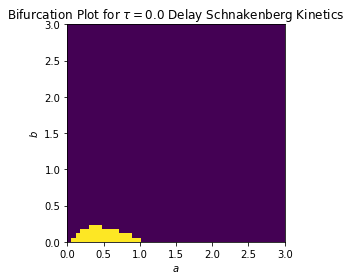

/Users/stephen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/stephen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/Users/stephen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/Users/stephen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars
/Users/stephen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/Users/stephen/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1986: RuntimeWarning: overflow encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/Users/stephen/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1986: RuntimeWarning: invalid value encountered in double_sc

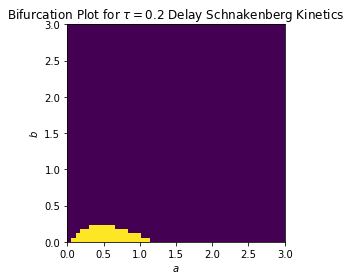

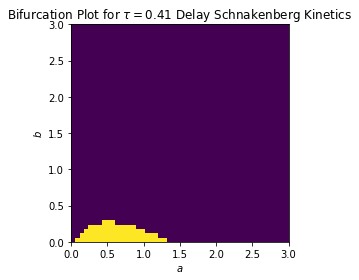

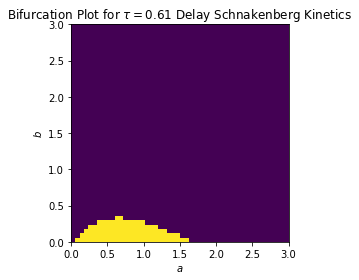

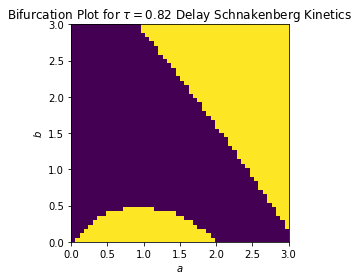

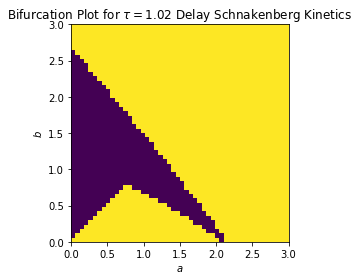

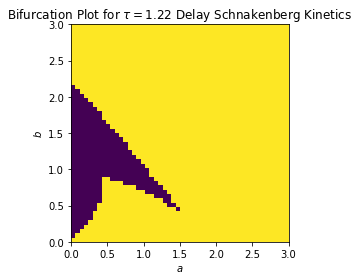

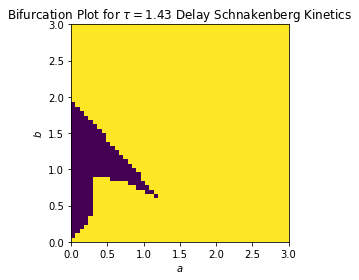

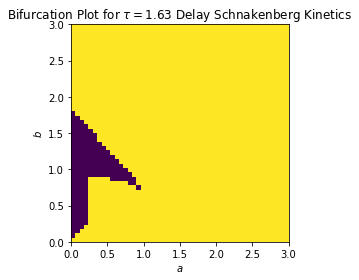

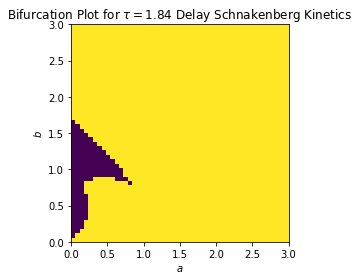

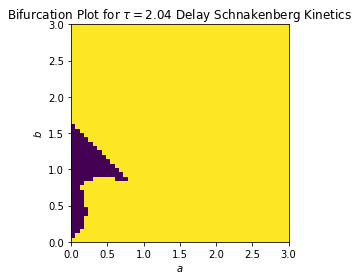

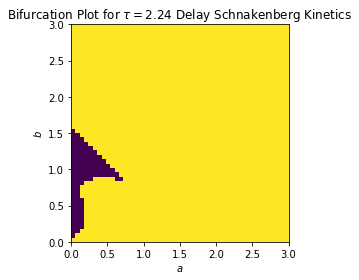

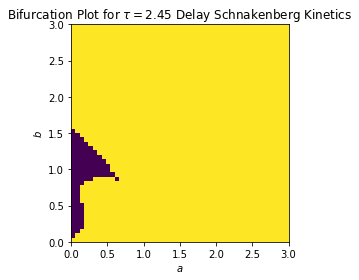

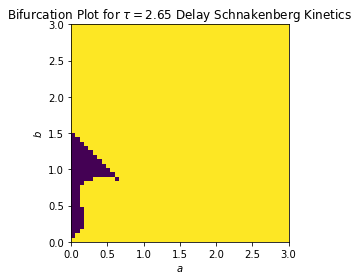

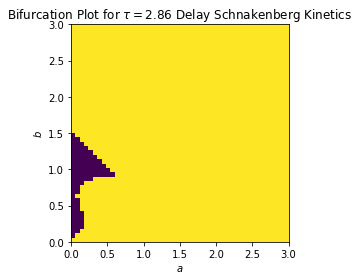

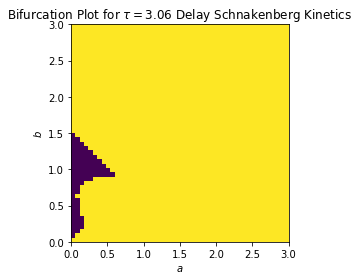

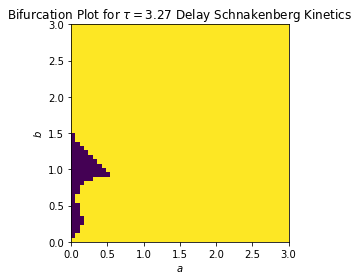

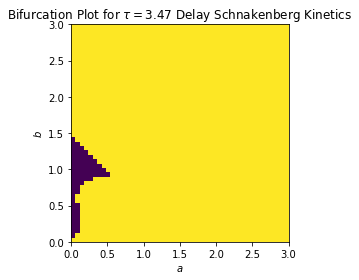

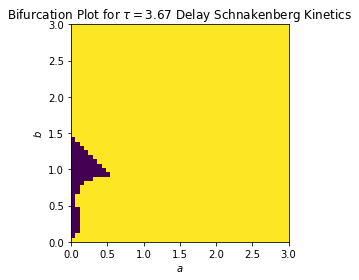

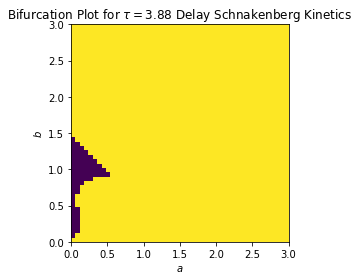

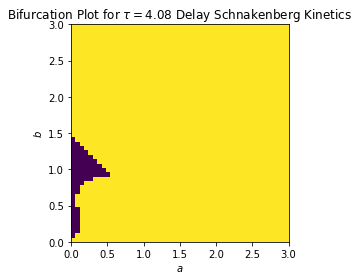

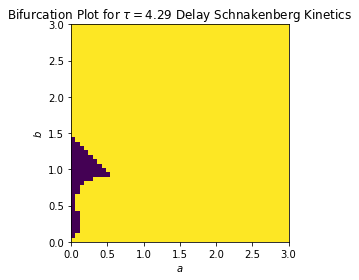

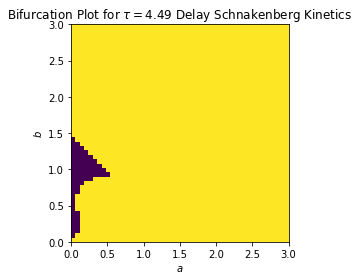

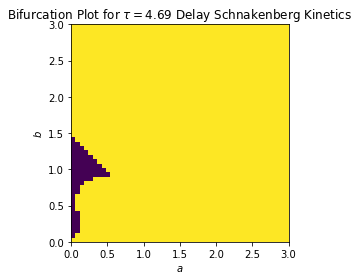

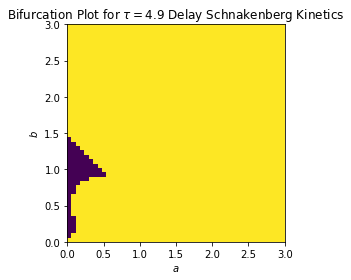

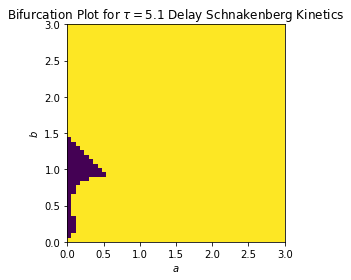

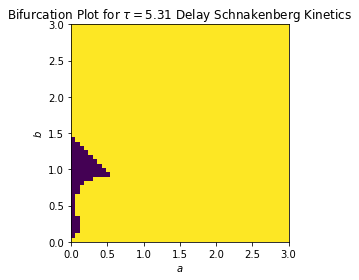

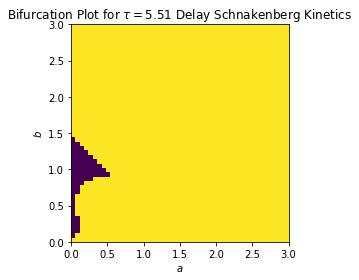

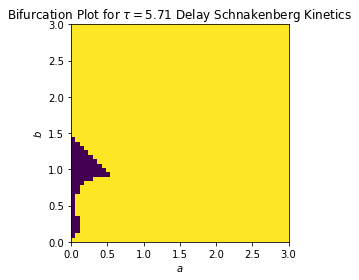

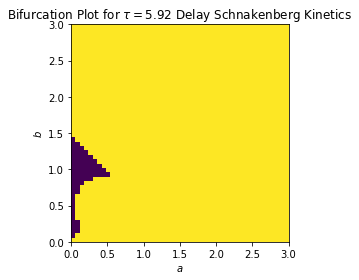

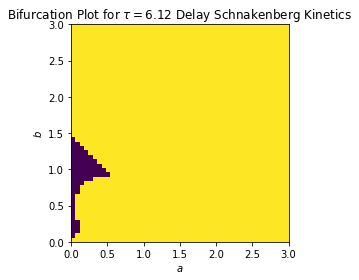

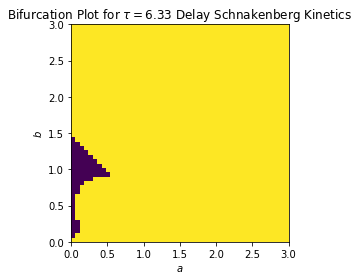

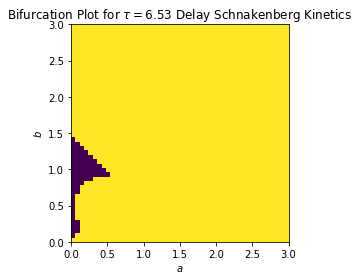

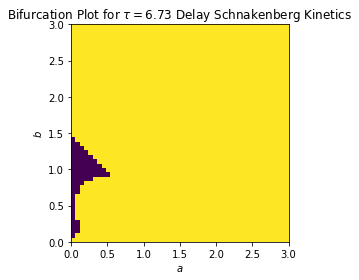

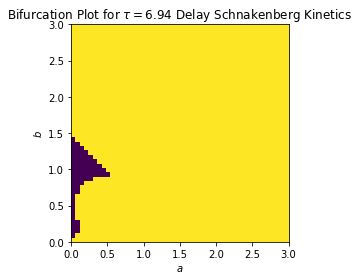

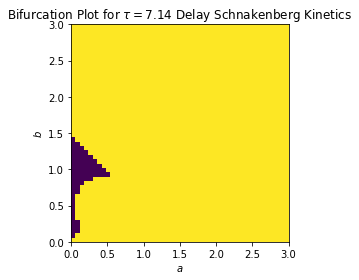

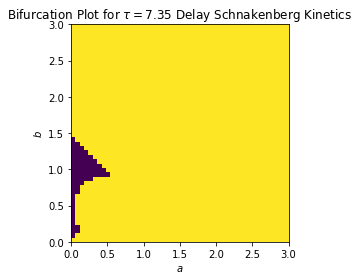

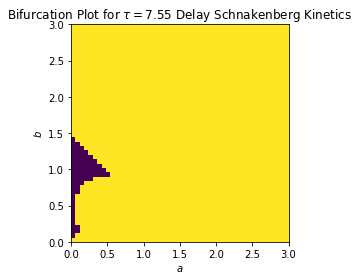

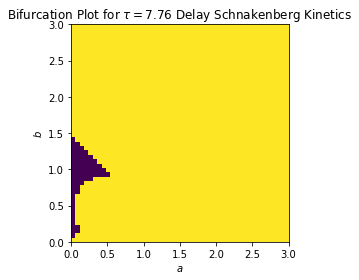

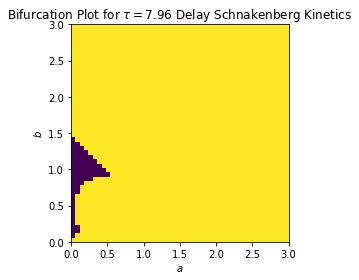

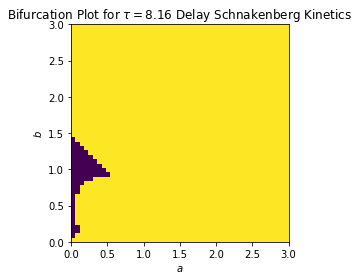

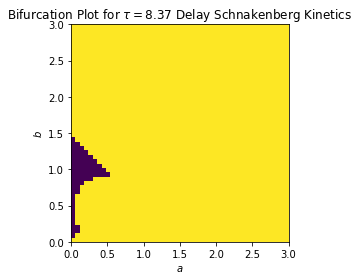

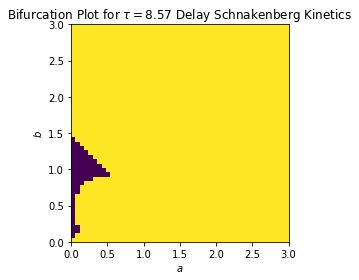

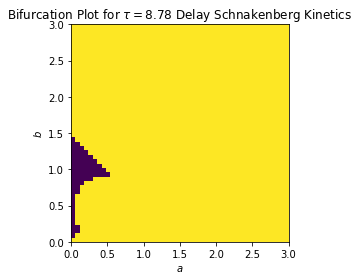

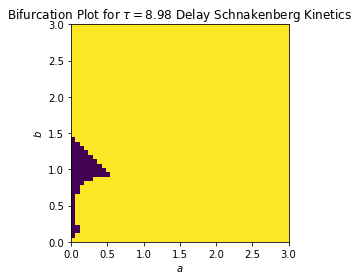

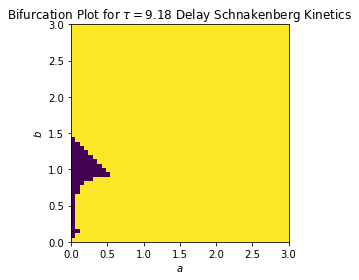

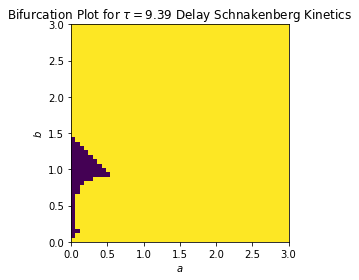

/Users/stephen/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2370: RuntimeWarning: overflow encountered in double_scalars
  denom = 2.0 * val


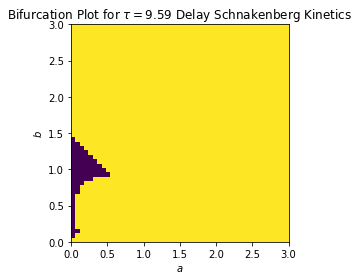

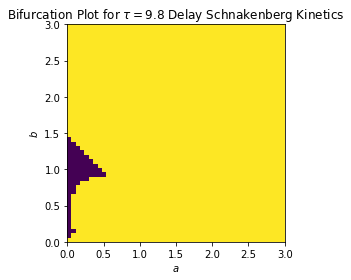

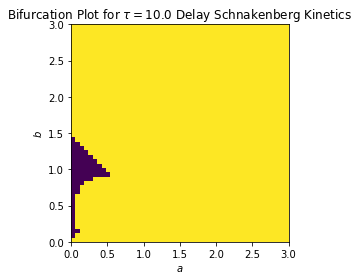

In [6]:
# Iterate through each of the delay values and produce a bifurcation plot for
# of them.
for tau_index in range(0, len(tau_values)):

    current_tau = tau_values[tau_index];

    # The matrix that will be used to store the type of fixed point that our
    # system contains for each combination of a and b values.
    fixed_point_types = NP.zeros((a_amt,b_amt));

    # Iterate through each combination of a and b values in the a_values and
    # b_values lists and classify the fixed point in each system.
    for i in range(0, a_amt):
        for j in range(0, b_amt):
            a = a_values[i];
            b = b_values[j];

            eigenvalues = computeEigenvalues(a, b, current_tau);
        
            max_eigenvalue = max([eigenvalues]);
            min_eigenvalue = min([eigenvalues]);

        
            # If the fixed point is asymptotically unstable.        
            if(min_eigenvalue>0):
                fixed_point_types[i][j] = source_colour_value;
            
            # If fixed point is a hyperbolic saddle.
            elif(min_eigenvalue<0 and max_eigenvalue>0):
                fixed_point_types[i][j] = saddle_colour_value;

            # If the fixed point is asymptotically stable.
            elif(max_eigenvalue<0):
                fixed_point_types[i][j] = sink_colour_value;
       

    # Plot types of fixed point in a bifurcatiion diagram.
    XX, YY = NP.meshgrid(a_values, b_values);
    fig = plt.figure();
    plt.title(r'Bifurcation Plot for $\tau = '+str(round(current_tau, 2))+'$ Delay Schnakenberg Kinetics');
    p = plt.imshow(fixed_point_types, extent=[0, max(a_values), max(b_values), 0]);
    #plt.colorbar(p);
    plt.xlabel('$a$');
    plt.ylabel('$b$');
    plt.gca().invert_yaxis()
    plt.show();